In [1]:
# GHOST - Euler Test (1D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh1D
from Discretization import SpatialDiscretization
from Solver import Solver


# discretization order
p = 4

p_geo = p

# set up periodic mesh
mesh = Mesh1D("mesh1d", 0.0, 1.0, 6)
left = [1.0, 0.0]
right = [1.0, 1.0]
mesh.add_bc_on_hyperplanes([left,right],[1,2])
mesh.make_periodic([1,2])

mesh.map_mesh(f_map=Mesh1D.grid_transformation(warp_factor=0.2), p_geo=p_geo)


# volume quadrature order
tau = 2*p+1

# solver parameters
params = {"project_title": "euler_test_1dq",
            "problem": "compressible_euler",
            "initial_condition": "entropy_wave",
            "specific_heat_ratio": 1.4,
            "numerical_flux": "roe",
            "integration_type": "quadrature",
            "solution_degree": p,
            "volume_quadrature_degree": tau,
            "form": "weak",
            "solution_representation": "modal",
            "time_integrator": "rk44",
            "final_time": 1.0,
            "time_step_scale": 0.1}

# set up solver
solver = Solver(params,mesh)

dt =  0.001851851851851852
writing every  540  time steps, total  540


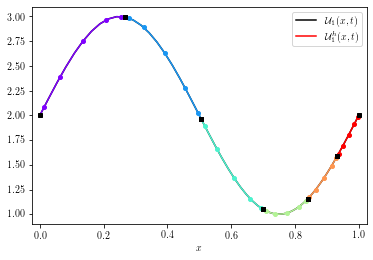

In [2]:
solver.run()
solver.post_process()
solver.plot(plot_nodes=True, plot_exact=True)